In [61]:
RED  = '#C82506'
BLUE = '#0365C0'
GREEN = '#00882B'
ORANGE = '#DE6A10'
PURPLE = '#773F9B'
YELLOW = '#DCBD23'

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def clean(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)


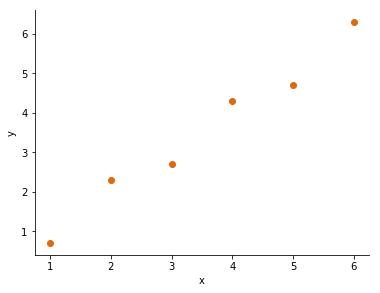

In [2]:
# Our learning problem

plt.figure(figsize=(6, 4.5))

x = np.asarray([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
y = np.asarray([0.7, 2.3, 2.7, 4.3, 4.7, 6.3])

plt.scatter(x, y, color=ORANGE)
clean(plt.gca())

plt.xlabel('x')
plt.ylabel('y')

plt.savefig('data.pdf')

In [3]:
# define the loss function
# (here, we pass the data as a parameter, but in the actual loss function these should
#  be seen as constants)

def loss(w, b, x, y):
    # add some dimensions, so that broadcasting works the way we expect
    # is w and b are vectors
    w = w.reshape(-1, 1)
    b = b.reshape(-1, 1)
    x = x.reshape(1, -1)
    y = y.reshape(1, -1)

    pred = x*w + b
    res = (pred - y) ** 2
    return res.sum(axis=1)

print(loss(np.asarray([1.0]), np.asarray([0.0]), x, y))

[ 0.54]


[-3.    -2.994 -2.988 ...,  2.982  2.988  2.994] [-3.    -3.    -3.    ...,  2.994  2.994  2.994] [ 2021.74      2016.608476  2011.483504 ...,   657.466636   660.377944
   663.295804]


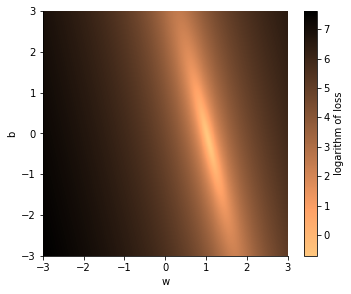

In [10]:
# Plot the loss surface

wr = (-3, 3)
br = (-3, 3)

h = 1000 # step nums in the mesh
ww, bb = np.meshgrid(np.arange(wr[0], wr[1], (wr[1] - wr[0])/h),
                     np.arange(br[0], br[1], (br[1] - br[0])/h))

# zz = clf.predict(n.c_[xx.ravel(), yy.ravel()])
# zz = zz.reshape(xx.shape)

losses = loss(ww.ravel(), bb.ravel(), x, y)

print(ww.ravel(), bb.ravel(), losses)
losses = losses.reshape(ww.shape)

# plot the loss landscape
plt.figure(figsize=(6, 4.5))
#plt.scatter(ww.ravel(), bb.ravel(), c=np.log(losses.ravel()), cmap='copper_r')
#plt.contourf(ww, bb, losses)
plt.imshow(np.log(losses), origin='lower', extent= wr+br, cmap='copper_r',) 

plt.xlabel('w')
plt.ylabel('b')

cb = plt.colorbar()
cb.set_label('logarithm of loss')

clean()

plt.savefig('loss-landscape.pdf')

In [13]:
# same thing, but in a utility function
def plot_surface():
    wr = (-3, 3)
    br = (-3, 3)

    h = 1000 # step nums in the mesh
    ww, bb = np.meshgrid(np.arange(wr[0], wr[1], (wr[1] - wr[0])/h),
                         np.arange(br[0], br[1], (br[1] - br[0])/h))

    # zz = clf.predict(n.c_[xx.ravel(), yy.ravel()])
    # zz = zz.reshape(xx.shape)

    losses = loss(ww.ravel(), bb.ravel(), x, y)

    print(ww.ravel(), bb.ravel(), losses)
    losses = losses.reshape(ww.shape)

    # plot the loss landscape
    plt.figure(figsize=(6, 4.5))
    #plt.scatter(ww.ravel(), bb.ravel(), c=losses.ravel())
    #plt.contourf(ww, bb, losses)
    plt.imshow(np.log(losses), origin='lower', extent= wr+br, cmap='copper_r') 

    plt.xlabel('w')
    plt.ylabel('b')

[-3.    -2.994 -2.988 ...,  2.982  2.988  2.994] [-3.    -3.    -3.    ...,  2.994  2.994  2.994] [ 2021.74      2016.608476  2011.483504 ...,   657.466636   660.377944
   663.295804]


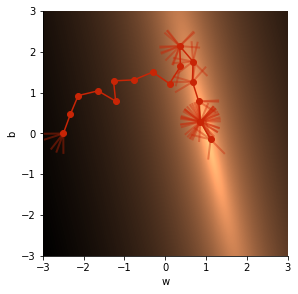

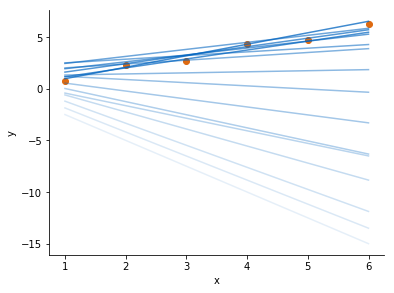

In [14]:
# Random search
import matplotlib
import numpy as np

# fix the random seed, so the experiment is repeatable
np.random.seed(9)

r = 0.5
its = 100

sequence = np.zeros((1, 2))
failures = []

current = np.asarray([-2.5, 0])
closs = loss(current[0], current[1], x, y)

sequence[0,:] = current

for i in range(its):
    # sample random point on the unit hypersphere: 
    #  - sample standard normally distributed numbers for each dimension
    direction = np.random.randn(2)
    
    #  - divide by the norm (length) of the vector to make it norm 1, but in the same direction
    delta = direction / np.linalg.norm(direction)
    
    # shrink to radius-r hypersphere
    delta *= r
    
    nxt = current + delta
    nloss = loss(nxt[0], nxt[1], x, y)
    if nloss < closs:
        current = nxt
        sequence = np.concatenate((sequence, nxt.reshape(1, -1)))
        closs = nloss
    else:
        failures.append([ (current[0], current[1]), (nxt[0], nxt[1]) ])
    
plt.figure(figsize=(6, 4.5))

plot_surface()
plt.plot(sequence[:,0], sequence[:,1], marker='o', color=RED)

lines = matplotlib.collections.LineCollection(failures, colors=RED, linewidths=2, alpha=0.4)
plt.gca().add_collection(lines)

clean()

plt.savefig('random-search.pdf')
        
# Plot the model in feature space

xlin = np.linspace(1.0, 6.0, 10)

plt.figure(figsize=(6, 4.5))

l = sequence.shape[0]

plt.scatter(x, y, color=ORANGE)
clean(plt.gca())

plt.xlabel('x')
plt.ylabel('y')

for i in range(l):
    w = sequence[i, 0]
    b = sequence[i, 1]
    plt.plot(x, x * w + b, color=BLUE, alpha= 0.1 + 0.7 * (i/l))

plt.savefig('random-search-featurespace.pdf')


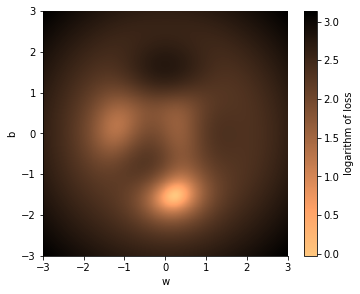

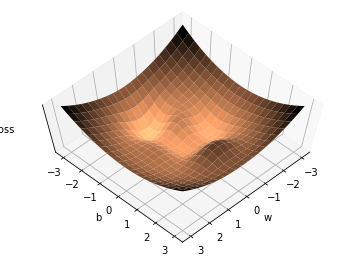

In [16]:
def loss2(w, s):
    # This is not a real loss function, just some random function with multiple minima 
    # (so we ignore the data)
    
    # peaks function, see https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/27178/versions/6/previews/html/saPeaksExample.html
    l = 3*(1 - w)** 2. * np.exp(-(w**2) - (s+1)  **2) - 10*(w/5 - w**3 - s**5) * np.exp(-w ** 2 - s ** 2)  - (1/3.0) * np.exp(-(w+1)** 2 - s**2)
    
    # add a parabola, to get rid of the maxima
    # (loss functions usually go to +inf for large parameters)
    l = l + w**2 + s**2 + 5
    
    return l

# Plot the loss surface

wr = (-3, 3)
br = (-3, 3)

h = 1000 # step nums in the mesh
ww, bb = np.meshgrid(np.arange(wr[0], wr[1], (wr[1] - wr[0])/h),
                     np.arange(br[0], br[1], (br[1] - br[0])/h))

# zz = clf.predict(n.c_[xx.ravel(), yy.ravel()])
# zz = zz.reshape(xx.shape)

losses = loss2(ww.ravel(), bb.ravel())

losses = losses.reshape(ww.shape)

# plot the loss landscape
plt.figure(figsize=(6, 4.5))
#plt.scatter(ww.ravel(), bb.ravel(), c=losses.ravel())
#plt.contourf(ww, bb, losses)
plt.imshow(np.log(losses), origin='lower', extent= wr+br, cmap='copper_r') 

plt.xlabel('w')
plt.ylabel('b')

cb = plt.colorbar()
cb.set_label('logarithm of loss')

clean()

plt.savefig('loss-nonconvex.pdf')

# 3D plot for good measure

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(70, 45)
ax.plot_surface(ww, bb, losses, rstride=50, cstride=50, cmap='copper_r')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
                              
ax.set_zticks([])

plt.savefig('loss-nc-3d.pdf')


In [18]:
# same thing, but in a utility function
def plot_surface2():
    wr = (-3, 3)
    br = (-3, 3)

    h = 1000 # step nums in the mesh
    ww, bb = np.meshgrid(np.arange(wr[0], wr[1], (wr[1] - wr[0])/h),
                         np.arange(br[0], br[1], (br[1] - br[0])/h))

    # zz = clf.predict(n.c_[xx.ravel(), yy.ravel()])
    # zz = zz.reshape(xx.shape)

    losses = loss2(ww.ravel(), bb.ravel())
    losses = losses.reshape(ww.shape)

    # plot the loss landscape
    # plt.scatter(ww.ravel(), bb.ravel(), c=losses.ravel(), cmap='copper_r')
    #plt.contourf(ww, bb, losses)
    plt.imshow(np.log(losses), origin='lower', extent= wr+br, cmap='copper_r') 

    plt.xlabel('w')
    plt.ylabel('b')

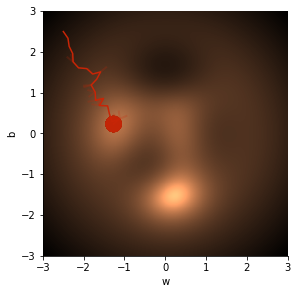

In [37]:
# Random search on the nonconvex surface
import matplotlib
import numpy as np

# fix the random seed, so the experiment is repeatable
np.random.seed(12)

r = 0.2
its = 1000

sequence = np.zeros((1, 2))
failures = []

current = np.asarray([-2.5, 2.5])
closs = loss(current[0], current[1], x, y)

sequence[0,:] = current

for i in range(its):
    # sample random point on the unit hypersphere: 
    #  - sample standard normally distributed numbers for each dimension
    direction = np.random.randn(2)
    
    #  - divide by the norm (length) of the vector to make it norm 1, but in the same direction
    delta = direction / np.linalg.norm(direction)
    
    # shrink to radius-r hypersphere
    delta *= r
    
    nxt = current + delta
    nloss = loss2(nxt[0], nxt[1])
    if nloss < closs:
        # print('success ', closs, nloss)
        
        current = nxt
        sequence = np.concatenate((sequence, nxt.reshape(1, -1)))
        closs = nloss

    else:
        # print('failure ', closs, nloss)
            
        failures.append([ (current[0], current[1]), (nxt[0], nxt[1]) ])
    
plt.figure(figsize=(6, 4.5))

plot_surface2()
plt.plot(sequence[:,0], sequence[:,1], color=RED)

lines = matplotlib.collections.LineCollection(failures, colors=RED, linewidths=2, alpha=0.2)
plt.gca().add_collection(lines)

clean()

plt.savefig('random-search-non-convex.pdf')
        

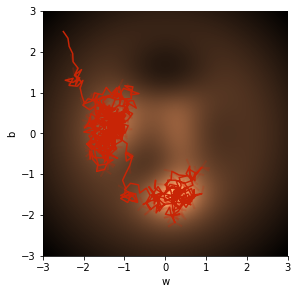

In [38]:
# Simulated annealing on the nonconvex surface
import matplotlib
import numpy as np

# fix the random seed, so the experiment is repeatable
np.random.seed(12)

r = 0.2
its = 1000
p = 0.4

sequence = np.zeros((1, 2))
failures = []

current = np.asarray([-2.5, 2.5])
closs = loss(current[0], current[1], x, y)

sequence[0,:] = current

for i in range(its):
    # sample random point on the unit hypersphere: 
    #  - sample standard normally distributed numbers for each dimension
    direction = np.random.randn(2)
    
    #  - divide by the norm (length) of the vector to make it norm 1, but in the same direction
    delta = direction / np.linalg.norm(direction)
    
    # shrink to radius-r hypersphere
    delta *= r
    
    nxt = current + delta
    nloss = loss2(nxt[0], nxt[1])
    if nloss < closs or np.random.random() < p:
        # print('success ', closs, nloss)
        
        current = nxt
        sequence = np.concatenate((sequence, nxt.reshape(1, -1)))
        closs = nloss
    else:
        # print('failure ', closs, nloss)
            
        failures.append([ (current[0], current[1]), (nxt[0], nxt[1]) ])
    
plt.figure(figsize=(6, 4.5))

plot_surface2()
plt.plot(sequence[:,0], sequence[:,1], color=RED)

lines = matplotlib.collections.LineCollection(failures, colors=RED, linewidths=2, alpha=0.2)
plt.gca().add_collection(lines)

clean()

plt.savefig('simulated-annealing-non-convex.pdf')

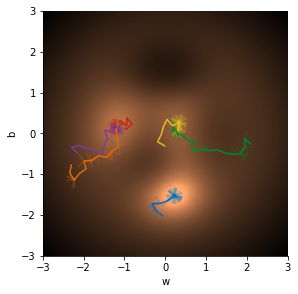

In [62]:
# Parallel random search on the nonconvex surface

# fix the random seed, so the experiment is repeatable
np.random.seed(26)

r = 0.2
its = 50

plt.figure(figsize=(6, 4.5))

plot_surface2()

def rsearch(current, color):
    sequence = np.zeros((1, 2))
    failures = []
    
    closs = loss(current[0], current[1], x, y)

    sequence[0,:] = current

    for i in range(its):
        # sample random point on the unit hypersphere: 
        #  - sample standard normally distributed numbers for each dimension
        direction = np.random.randn(2)

        #  - divide by the norm (length) of the vector to make it norm 1, but in the same direction
        delta = direction / np.linalg.norm(direction)

        # shrink to radius-r hypersphere
        delta *= r

        nxt = current + delta
        nloss = loss2(nxt[0], nxt[1])
        if nloss < closs:
            # print('success ', closs, nloss)

            current = nxt
            sequence = np.concatenate((sequence, nxt.reshape(1, -1)))
            closs = nloss

        else:
            # print('failure ', closs, nloss)

            failures.append([ (current[0], current[1]), (nxt[0], nxt[1]) ])


    plt.plot(sequence[:,0], sequence[:,1], color=color)

    lines = matplotlib.collections.LineCollection(failures, colors=color, linewidths=2, alpha=0.2)
    plt.gca().add_collection(lines)

    
rsearch(np.asarray(np.random.random(2) * 5.0 - 2.5), RED)
rsearch(np.asarray(np.random.random(2) * 5.0 - 2.5), BLUE)
rsearch(np.asarray(np.random.random(2) * 5.0 - 2.5), GREEN)
rsearch(np.asarray(np.random.random(2) * 5.0 - 2.5), ORANGE)
rsearch(np.asarray(np.random.random(2) * 5.0 - 2.5), PURPLE)
rsearch(np.asarray(np.random.random(2) * 5.0 - 2.5), YELLOW)
      
clean()

plt.savefig('parallel-randsearch.pdf')